In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
import re
import string
import codecs
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
# Read the dataset
data = pd.read_csv('/home/vinod/Downloads/language_detection.csv')
#print the top five rows  of the data
data.head().style.background_gradient(cmap='Red')

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn kandis aastatel – nime gottwaldov ukrainas harkivi oblastis kandis zmiivi linn aastatel – nime gotvald,Estonian
1,sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร และเขตบางคอแหลม,Thai
3,"விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் ""தமிழ்ச்சங்கங்களும் தமிழும்"" எனும் தலைப்பில் பிற மாநிலங்களில் தமிழ்வளர்ச்சி பற்றி கட்டுரை வாசித்தார்",Tamil
4,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,Dutch


In [3]:
#Check the datashape
data.shape

(22000, 2)

In [4]:
#check the data inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB


In [5]:
#Let's find the uniue lanugaes in the data
data['language'].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

/home/vinod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='language', ylabel='count'>

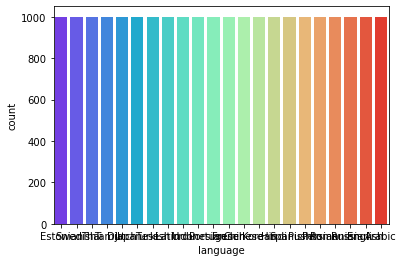

In [6]:
#Let's visualize  the languages using the countplot
sns.countplot(data['language'],palette='rainbow')

# Data Pre_Processing

In [7]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


# Divided the data into X and y

In [8]:
#Let's divided the data into X and y
X=data['Text'].values
y=data['language'].values

# Convert the data into vector forms because our machine can't read the text data in this process we use tdifvectorizer for covert the vectores

In [9]:
#And convert the text into array using the tdifvectorizer because our 
tfid=TfidfVectorizer()
tfid.fit(X)
X=tfid.transform(X)

# Divided the data into train and test 

In [10]:
#Divided the data into train_test_spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [11]:
#Print the train and test shape
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(6600, 277720)
(6600,)
(15400, 277720)
(15400,)


# MultinomialNB

In [12]:
#Import the MultinomialNB algorithm to train the our model
from sklearn.naive_bayes import MultinomialNB
#install the model
multinomial=MultinomialNB()
#fit the train data to our model
multinomial.fit(X_train,y_train)

MultinomialNB()

In [13]:
#Prediction to the test data
multinomial_pred=multinomial.predict(X_test)
multinomial_pred

array(['Japanese', 'Russian', 'Latin', ..., 'Spanish', 'Arabic',
       'Estonian'], dtype='<U10')

In [14]:
#Let's print the train score and test score to the model
print('multinomial score for test data:{}%'.format(round(multinomial.score(X_test,y_test)*100,2)))
print('multinomial score for train data:{}%'.format(round(multinomial.score(X_train,y_train)*100,2)))
#print the accuracy_score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,multinomial_pred)*100,2)))

multinomial score for test data:95.71%
multinomial score for train data:98.41%
accuracy_score: 95.71%


# Classification_report

In [15]:
classification=classification_report(y_test,multinomial_pred)
print(classification)

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       300
     Chinese       0.74      0.85      0.79       291
       Dutch       0.99      0.98      0.99       313
     English       0.68      1.00      0.81       289
    Estonian       0.99      0.96      0.98       308
      French       0.93      0.99      0.96       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       0.99      0.98      0.98       295
    Japanese       0.99      0.62      0.76       302
      Korean       1.00      0.98      0.99       296
       Latin       0.99      0.91      0.94       312
     Persian       1.00      1.00      1.00       299
   Portugese       1.00      0.96      0.98       293
      Pushto       1.00      0.97      0.98       303
    Romanian       0.98      0.98      0.98       291
     Russian       0.98      0.99      0.99       302
     Spanish       0.96      0.99      0.98       287
     Swedish       0.99    

# Confusion_matrix

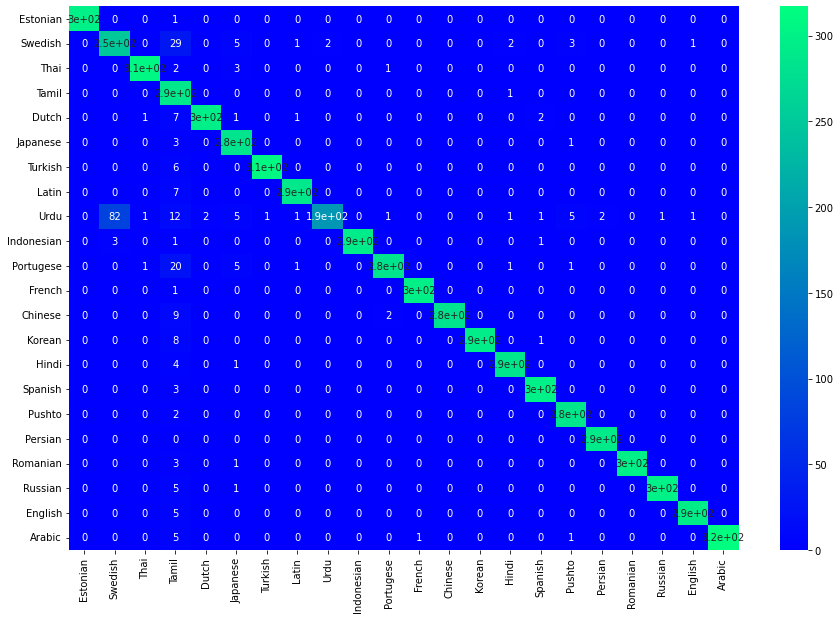

In [16]:
confusion=confusion_matrix(y_test,multinomial_pred)
plt.figure(figsize=(15,10))
sns.heatmap(confusion,annot=True,cmap='winter',xticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], yticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'])
plt.show()

In [17]:
#Let's check the Logistic algorithm to our model
from sklearn.tree import DecisionTreeClassifier
#install the model
tree=DecisionTreeClassifier()
#Let's fit the train data to our model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
#Predictions
tree_pred=tree.predict(X_test)
tree_pred

array(['Japanese', 'Russian', 'Latin', ..., 'Spanish', 'Arabic',
       'Estonian'], dtype=object)

In [19]:
#Let's print the train score and test score to the model
print('Decison tree score for test data:{}%'.format(round(tree.score(X_test,y_test)*100,2)))
print('Decison tree for train data:{}%'.format(round(tree.score(X_train,y_train)*100,2)))
#print the accuracy_score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,tree_pred)*100,2)))

Decison tree score for test data:89.3%
Decison tree for train data:100.0%
accuracy_score: 89.3%


# Classification_report

In [20]:
#Classification report 
classification=classification_report(y_test,tree_pred)
print(classification)

              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       300
     Chinese       0.76      0.34      0.47       291
       Dutch       0.40      0.95      0.57       313
     English       0.85      0.90      0.88       289
    Estonian       0.96      0.92      0.94       308
      French       0.93      0.91      0.92       287
       Hindi       0.97      0.96      0.97       314
  Indonesian       0.97      0.97      0.97       295
    Japanese       0.98      0.44      0.60       302
      Korean       0.99      0.89      0.94       296
       Latin       0.86      0.88      0.87       312
     Persian       0.99      0.99      0.99       299
   Portugese       0.96      0.94      0.95       293
      Pushto       0.99      0.96      0.97       303
    Romanian       0.96      0.95      0.95       291
     Russian       0.98      0.93      0.95       302
     Spanish       0.92      0.93      0.93       287
     Swedish       0.99    

# Confusion_matrix

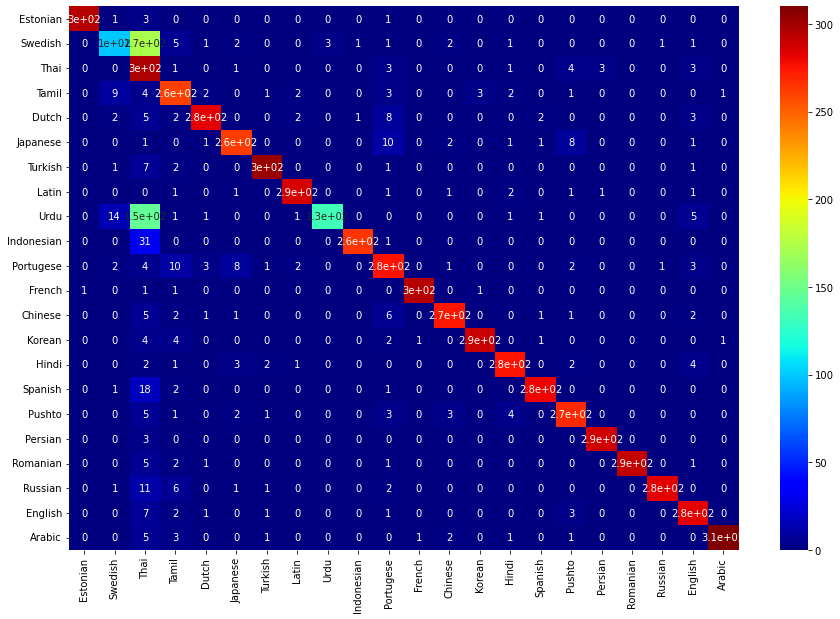

In [21]:
confusion=confusion_matrix(y_test,tree_pred)
plt.figure(figsize=(15,10))
sns.heatmap(confusion,annot=True,cmap='jet',xticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], yticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'])
plt.show()

# BernoulliNB

In [22]:
#Import the BernoulliNB algorithm to train the our model
from sklearn.naive_bayes import BernoulliNB
#install the model
bernoulli=BernoulliNB()
#fit the train data to our model
bernoulli.fit(X_train,y_train)

BernoulliNB()

In [23]:
#Prediction
bernoulli_pred=bernoulli.predict(X_test)
bernoulli_pred

array(['Japanese', 'Russian', 'Latin', ..., 'Spanish', 'Arabic',
       'Estonian'], dtype='<U10')

In [24]:
#Let's print the train score and test score to the model
print('BernoulliNB score for test data:{}%'.format(round(bernoulli.score(X_test,y_test)*100,2)))
print('BernoulliNBfor train data:{}%'.format(round(bernoulli.score(X_train,y_train)*100,2)))
#print the accuracy_score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,bernoulli_pred)*100,2)))

BernoulliNB score for test data:91.15%
BernoulliNBfor train data:96.43%
accuracy_score: 91.15%


# Classification_report

In [25]:
#Classification report 
classification=classification_report(y_test,bernoulli_pred)
print(classification)

              precision    recall  f1-score   support

      Arabic       1.00      0.93      0.96       300
     Chinese       0.36      0.99      0.53       291
       Dutch       1.00      0.97      0.98       313
     English       0.84      0.99      0.90       289
    Estonian       1.00      0.84      0.91       308
      French       0.97      0.98      0.98       287
       Hindi       1.00      0.97      0.99       314
  Indonesian       1.00      0.98      0.99       295
    Japanese       0.94      0.50      0.65       302
      Korean       1.00      0.71      0.83       296
       Latin       1.00      0.83      0.90       312
     Persian       1.00      0.99      0.99       299
   Portugese       1.00      0.94      0.97       293
      Pushto       1.00      0.94      0.97       303
    Romanian       1.00      0.98      0.99       291
     Russian       1.00      0.84      0.91       302
     Spanish       0.99      0.98      0.99       287
     Swedish       1.00    

# Confusion_matrix 

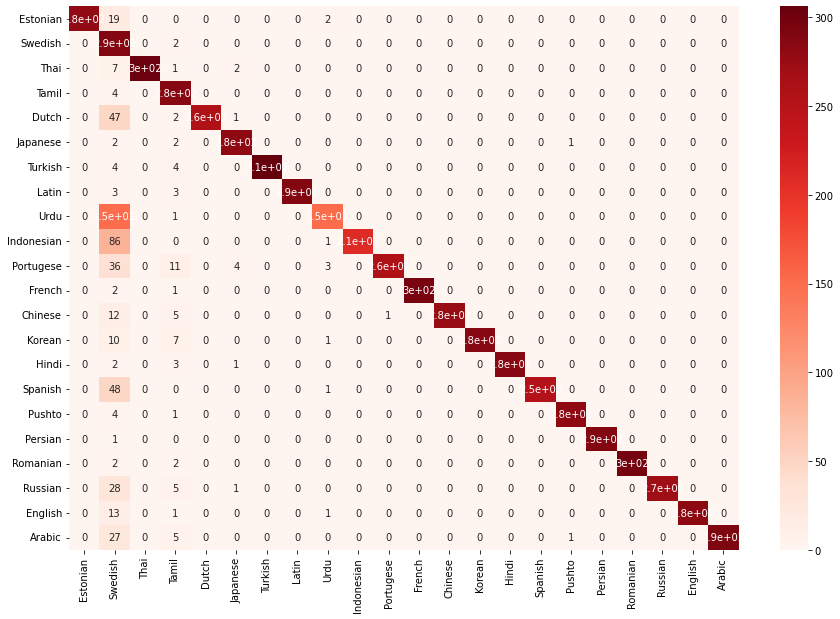

In [26]:
confusion=confusion_matrix(y_test,bernoulli_pred)
plt.figure(figsize=(15,10))
sns.heatmap(confusion,annot=True,cmap='Reds',xticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], yticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'])
plt.show()

# RandomForestClassifier

In [27]:
#Import the GaussianNB algorithm to train the our model
from sklearn.ensemble import RandomForestClassifier
#install the model
random=RandomForestClassifier()
#fit the model to train data
random.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
#Prediction
random_pred=random.predict(X_test)
random_pred

array(['Japanese', 'Russian', 'Latin', ..., 'Spanish', 'Arabic',
       'Estonian'], dtype=object)

In [29]:
#Let's print the train score and test score to the model
print('BernoulliNB score for test data:{}%'.format(round(random.score(X_test,y_test)*100,2)))
print('BernoulliNBfor train data:{}%'.format(round(random.score(X_train,y_train)*100,2)))
#print the accuracy_score
print('accuracy_score: {}%'.format(round(accuracy_score(y_test,random_pred)*100,2)))

BernoulliNB score for test data:91.88%
BernoulliNBfor train data:100.0%
accuracy_score: 91.88%


# Classification_report

In [30]:
#Classification report 
classification=classification_report(y_test,random_pred)
print(classification)

              precision    recall  f1-score   support

      Arabic       1.00      0.99      1.00       300
     Chinese       0.86      0.30      0.44       291
       Dutch       0.42      0.98      0.59       313
     English       0.82      0.99      0.90       289
    Estonian       0.99      0.96      0.97       308
      French       0.97      0.98      0.97       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       0.98      0.98      0.98       295
    Japanese       0.98      0.38      0.55       302
      Korean       1.00      0.94      0.97       296
       Latin       0.96      0.94      0.95       312
     Persian       1.00      0.99      0.99       299
   Portugese       0.99      0.99      0.99       293
      Pushto       1.00      0.96      0.98       303
    Romanian       1.00      0.98      0.99       291
     Russian       0.99      0.95      0.97       302
     Spanish       0.98      0.98      0.98       287
     Swedish       1.00    

# Confusion_matrix

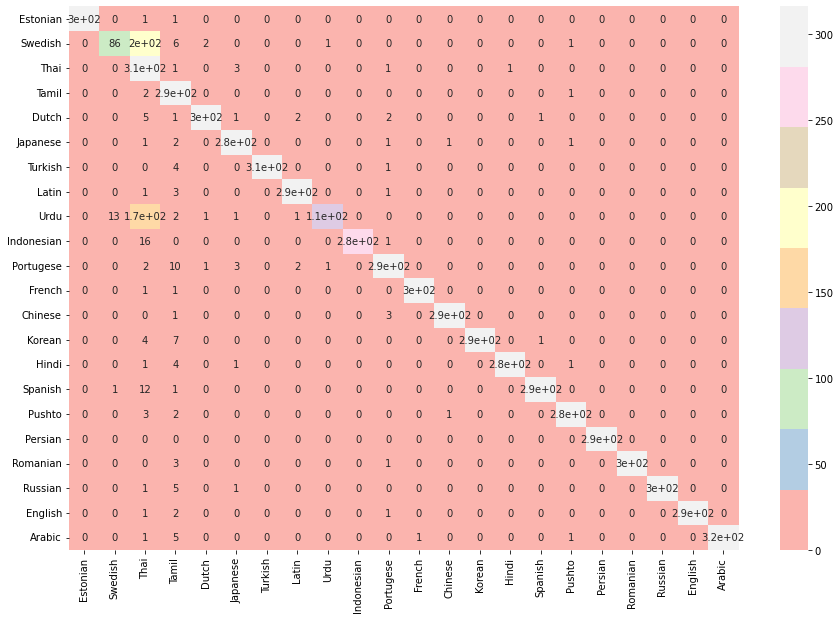

In [31]:
confusion=confusion_matrix(y_test,random_pred)
plt.figure(figsize=(15,10))
sns.heatmap(confusion,annot=True,cmap='Pastel1',xticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], yticklabels=['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'])
plt.show()

In [32]:
# helper function for comparing models matric

def compare_models(models,names,X_train,y_train,X_test,y_test):
    # the libraries we need
    import sklearn.metrics as metrics

    for (model,name) in zip(models,names):
      print(name)
      # then predict on the test set
      y_pred =  model.predict(X_test)
      res = classification_report(y_test,y_pred)
      print("Classification Report \n",res)
      print("---------------------------------------------------------------------------------------")


In [33]:
# list of model objects
models= [multinomial,bernoulli,tree, random ]
# list of model names
names = ['multinomial', 'bernoulli','decisiontreeclassifier', 'randomtreeclassifier']
# print the comparison of models
compare_models(models,names,X_train,y_train,X_test,y_test)

multinomial
Classification Report 
               precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       300
     Chinese       0.74      0.85      0.79       291
       Dutch       0.99      0.98      0.99       313
     English       0.68      1.00      0.81       289
    Estonian       0.99      0.96      0.98       308
      French       0.93      0.99      0.96       287
       Hindi       1.00      0.98      0.99       314
  Indonesian       0.99      0.98      0.98       295
    Japanese       0.99      0.62      0.76       302
      Korean       1.00      0.98      0.99       296
       Latin       0.99      0.91      0.94       312
     Persian       1.00      1.00      1.00       299
   Portugese       1.00      0.96      0.98       293
      Pushto       1.00      0.97      0.98       303
    Romanian       0.98      0.98      0.98       291
     Russian       0.98      0.99      0.99       302
     Spanish       0.96      0.99      0.98  

# Let's check the our model predict the  languages using multinomi algorithms

In [34]:
text = """Türkiye Cumhuriyeti güçlüdür ve 
ilelebet baki kalacaktır."""
text=[text]
text_int=tfid.transform(text)
prediction=multinomial.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Turkish'

In [35]:
text = """விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களும் தமிழும்" ."""
text=[text]
text_int=tfid.transform(text)
prediction=multinomial.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Tamil'

In [36]:
text = """ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้"""
text=[text]
text_int=tfid.transform(text)
prediction=multinomial.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Thai'

In [37]:
text = """I have two friends with theri hapeens my relative shows."""
text=[text]
text_int=tfid.transform(text)
prediction=multinomial.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is English'

# Finally our multinomial modle predict the good result to the test data with accuracy_score 96% 

# Let's check the our model predict the  languages using bernoulli algorithms

In [38]:
text = """Türkiye Cumhuriyeti güçlüdür ve 
ilelebet baki kalacaktır."""
text=[text]
text_int=tfid.transform(text)
prediction=bernoulli.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Chinese'

In [39]:
text = """விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களும் தமிழும்" ."""
text=[text]
text_int=tfid.transform(text)
prediction=bernoulli.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Tamil'

In [40]:
text = """ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้"""
text=[text]
text_int=tfid.transform(text)
prediction=bernoulli.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Thai'

In [41]:
text = """I have two friends with theri hapeens my relative shows."""
text=[text]
text_int=tfid.transform(text)
prediction=bernoulli.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Chinese'

# Compare to the multnomial the bernoulli gave not good result so we can' t consider the model

# Let's check the our model predict the  languages using decisontree algorithms

In [42]:
text = """Türkiye Cumhuriyeti güçlüdür ve 
ilelebet baki kalacaktır."""
text=[text]
text_int=tfid.transform(text)
prediction=tree.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Turkish'

In [43]:
text = """விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களும் தமிழும்" ."""
text=[text]
text_int=tfid.transform(text)
prediction=tree.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Tamil'

In [44]:
text = """ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้"""
text=[text]
text_int=tfid.transform(text)
prediction=tree.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Thai'

In [45]:
text = """I have two friends with theri hapeens my relative shows."""
text=[text]
text_int=tfid.transform(text)
prediction=tree.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Chinese'

# Compare to the multnomial the decisiontree gave not good result so we can' t consider the model

# Let's check the our model predict the  languages using randomforesttree algorithms

In [47]:
text = """Türkiye Cumhuriyeti güçlüdür ve 
ilelebet baki kalacaktır."""
text=[text]
text_int=tfid.transform(text)
prediction=random.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Turkish'

In [48]:
text = """விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் "தமிழ்ச்சங்கங்களும் தமிழும்" ."""
text=[text]
text_int=tfid.transform(text)
prediction=random.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Tamil'

In [49]:
text = """ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้"""
text=[text]
text_int=tfid.transform(text)
prediction=random.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Thai'

In [50]:
text = """I have two friends with theri hapeens my relative shows."""
text=[text]
text_int=tfid.transform(text)
prediction=random.predict(text_int)
f"Prediction is {prediction[0]}"

'Prediction is Dutch'

# Compare to the multnomial the randomforestclassifier gave not good result so we can' t consider the model

# Conclusion

We take the dataset from the kaggle website. The data processing involves several steps such as 
1.Data loading
2.Data preprocessing
3.EDA (just basic eda process)
4.Data modeling
5.Covert the data into vector forms
6.Divided the data into train and test
7.using the several algorithm to give best accuracy score to the test data set

In [52]:
#Save the model into pickle format
import pickle

In [53]:
# create an iterator object with write permission - model.pkl
with open('multinomial_pkl', 'wb') as files:
    pickle.dump(multinomial, files)